In [ ]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# !pip install easyocr
import easyocr as ocr

In [ ]:
path = "//content//drive//MyDrive//Tyre_text_extraction//dataset" 

imgpath =  path + "tyre-2.jpg"

imgpath = "/content/drive/MyDrive/Tyre_text_extraction/dataset/tyre-1.jpg" 
img = cv2.imread(imgpath)

# cv2.imshow('Original image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

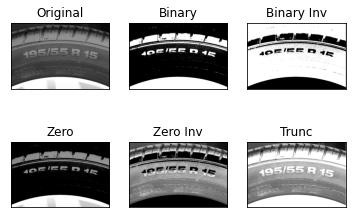

In [ ]:
th = 125
max_val = 255

ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY)
ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV)
ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO)
ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV )
ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC)
    
output = [img, o1, o2, o3, o4, o5]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Trunc']
    
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

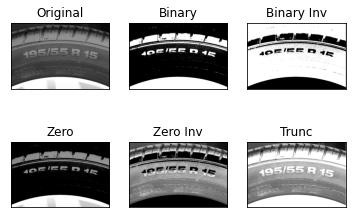

In [ ]:
th = 0
max_val = 255
    
ret, o6 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o7 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, o8 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, o9 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o10 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
output = [img, o1, o2, o3, o4, o5]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Trunc']
    
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show() 

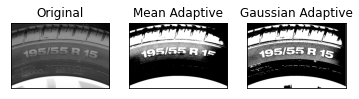

In [ ]:

block_size = 413
constant = 2
th1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)
th2 = cv2.adaptiveThreshold (img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant)
    
output = [img, th1, th2]
    
titles = ['Original', 'Mean Adaptive', 'Gaussian Adaptive']
    
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

In [ ]:
images = [img,o1,o2,o3,o4,o5,o6,o7,o8,o9,o10,th1,th2]
titles = ['original','o1','o2','o3','o4','o5','o6','o7','o8','o9','o10','th1','th2']

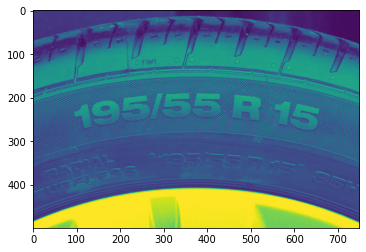

In [ ]:
plt.imshow(img)

In [ ]:
reader = ocr.Reader(['en'],model_storage_directory='.')   
# result = reader.readtext(np.array(th1))

for i in range(len(images)):
  result = reader.readtext(np.array(images[i]))
  print(titles[i])
  for j in result:
    print(j[-2],j[-1])
  print("-----------------")

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


original
O1wi 0.15051943063735962
195/55 0.9419619662432174
= =t..2 0.004496707429955649
R15 0.7061680806017316
7331356 0.03384918648512445
2e 0.09620953163683615
-----------------
o1
A01 0.03298665734207827
-----------------
o2
3twi 0.1950364112854004
3 0.9974398330821401
46 0.09443990627289267
-----------------
o3
ctwi 0.29610738158226013
3 0.12040827808822119
4FI5e 0.09333603286057715
-----------------
o4
Twi 0.7504984274981729
405/55R" 0.10956968805231113
25230-3 0.1107754911993803
3702 0.02245933935046196
-----------------
o5
195/55 0.6726714985740312
= =t..2 0.004496707429955649
R15 0.9699686691078107
RASA 0.004999228753149509
637F38 0.1778851171576294
237 0.028980770310578035
-----------------
o6
-----------------
o7
-----------------
o8
-----------------
o9
6 0.2711019627453517
195/55 0.9772533513290739
25250e- 0.017523651072814214
r15 0.6215594200066391
7734133 0.01100553405186796
2e7 0.019338128364334982
-----------------
o10
O1wi 0.1400524526834488
195/55 0.933230397583347
2

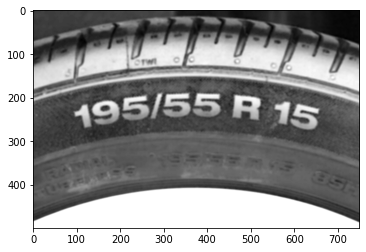

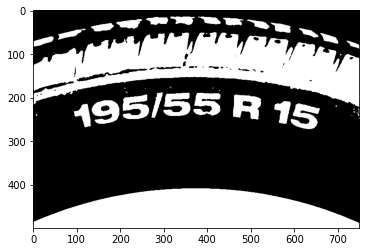

In [ ]:
kernal = np.ones((3,3), np.uint8)

erosion = cv2.erode(img, kernal, iterations=1)

guassian = cv2.GaussianBlur(erosion, (5,5),cv2.BORDER_DEFAULT)

_,t = cv2.threshold(guassian, 90, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )

mean = cv2.adaptiveThreshold(guassian, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)


plt.imshow(t, cmap='gray')
plt.show()
plt.imshow(mean, cmap='gray')
result = reader.readtext(np.array(mean))

In [ ]:
result

[([[79, 163], [451, 163], [451, 283], [79, 283]],
  '195/55',
  0.8976390980849197),
 ([[459.0578369393376, 176.04945092370735],
   [668.8775453144893, 213.52040911425178],
   [650.9421630606624, 288.95054907629265],
   [441.1224546855107, 251.47959088574822]],
  'r 15',
  0.940058442963036)]